In [ ]:
#https://drive.google.com/drive/u/0/folders/1WCxe1EuxLo6qyGVpupcEMTgN83xpgHM_

In [ ]:
import cv2 , os 

data_path = "/content/drive/My Drive/Colab Notebooks/dataset/face mask detection/dataset"
categories = os.listdir(data_path)
labels = [i for i in range (len(categories))]

label_dict = dict(zip(categories , labels))  # empty dict

print(label_dict)
print(labels)
print(categories)

FileNotFoundError: ignored

In [ ]:
img_size = 100
data = []
target_label = []  #empty list

for category in categories:
  folder_path = os.path.join(data_path , category) #path = "dataset/with_mask"
  img_names = os.listdir(folder_path) # all images in that folder

  for img_name in img_names:
    img_path = os.path.join(folder_path , img_name) #img_path = dataset/with_mask/1.jpg
    img = cv2.imread(img_path) #read every image 

    try:
      gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)  #convert color bgr to gray
      resize = cv2.resize(gray , (img_size , img_size)) # resize gray img into 100*100
      

      data.append(resize)
      target_label.append(label_dict[category]) #append the value of label_dict[category] 
    


    except Exception as e:
      print("Exception" , e)  # if any exception raised then it printed and pass next image

      







In [ ]:
print ("done")

done


In [ ]:
import numpy as np

data = np.array(data)/255.0   #covert image to array and then normalized images into 0 and 1

#print(data.shape) #1376,100,100
#print(data.shape[0]) #1376

data = np.reshape(data , (data.shape[0] , img_size , img_size , 1)) 
# here 1 is used for converting to a 4-d array bcz nueral network needs 4-d array 

target = np.array(target_label)
#print(target.shape)#total 1376 of mask(1 label) and non-mask(0 label)


from keras.utils import np_utils

new_target = np_utils.to_categorical(target) 
# convert to categorical representation .last 2 neourons are 2 categories mask and non-mask


NameError: ignored

In [ ]:
np.save('data' ,data) # save data into data array
np.save('target' , new_target)#save the target into the new_target

In [ ]:
#cnn architecture 


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation , Flatten , Dropout
from keras.layers import Conv2D , MaxPooling2D
from keras.callbacks import ModelCheckpoint

In [ ]:
model = Sequential()

model.add(Conv2D(200 , (3,3), input_shape = data.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
#first cnn layer followed by relu and maxpooling layers

model.add(Conv2D(100,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
#2nd cnn layer follwed by relu and maxpooling layers

model.add(Flatten())
model.add(Dropout(0.5))
#flatten layer

model.add(Dense(50 , activation='relu')) 
model.add(Dropout(0.5))
#dense layer of 50 neurons

model.add(Dense(1,activation= 'sigmoid'))
#the final layer with 2 outputs for two categories

#model compile
model.compile(loss='binary_crossentropy' , optimizer = 'adam' , metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 200)       2000      
_________________________________________________________________
activation (Activation)      (None, 98, 98, 200)       0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 100)       0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 52900)             0

In [ ]:
print(data.shape)

(1376, 100, 100, 1)


In [ ]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target = train_test_split(data , target , test_size =0.1)

In [ ]:
print(train_data.shape)
print(train_target.shape)

(1238, 100, 100, 1)
(1238,)


In [ ]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.2)

Epoch 1/20
31/31 [==============================] - ETA: 0s - loss: 0.7082 - accuracy: 0.5222WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/training/tracking/tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model-001.model/assets
31/31 [==============================] - 3s 83ms/step - loss: 0.7082 - accuracy: 0.5222 - val_loss: 0.6788 - val_accuracy: 0.7460
Epoch 2/20
31/31 [==============================] - 2s 70ms/step - loss: 0.6465 - accuracy: 0.6313 - val_loss: 0.5236 - val_accuracy: 0.8306
Epoch 3/20
31/31 [==============================] - 2s 67ms/step - loss: 0.4798 - accuracy: 0.7768 - val_l

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],label='training loss' )
plt.plot(history.history['val_loss'] , label ='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

NameError: ignored

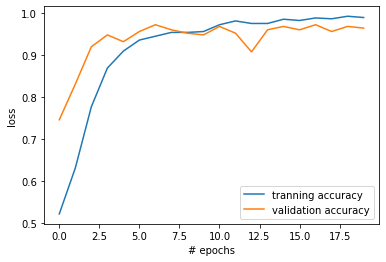

In [ ]:
from matplotlib import pyplot as plt 

plt.plot(history.history['accuracy'] , label='tranning accuracy')
plt.plot(history.history['val_accuracy'] , label = 'validation accuracy')
plt.xlabel("# epochs")
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
print(model.evaluate(test_data ,test_target ))

5/5 [==============================] - 0s 20ms/step - loss: 0.0622 - accuracy: 0.9710
[0.062211278825998306, 0.9710144996643066]
